# Frozen_lake SARSA

### Code generated by Vahid Bagherian

##### Installing the required packages for the environment

In [1]:
!pip install PyVirtualDisplay==3.0
!pip install gym
!pip install gymnasium[toy-text]

##### Importing the required packages

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

import gym 

import random
import sys



Here we create the environment for the frozen lake. We have put the grid size to be 4 as default and the results are presented. You can change this value to other values if required. However, if the grid numbers are increased, the number of episodes to be trained and the maximum number of steps in each episode should also be increased as it takes more steps, more episodes and of course mre time to train the system. The training and simulation is applied for different grid numbers (5,6, and 8). For all cases the system was trained and tested and gor proper results. 

In [2]:
# Creating the environment of the frozen lake and determining the required options like the size of the grids and the mode for rendering 
Gridsize = 4
from gym.envs.toy_text.frozen_lake import generate_random_map

env = gym.make('FrozenLake-v1', render_mode = 'rgb_array',desc=generate_random_map(size=Gridsize), is_slippery=False)

In [3]:
# Showing the initial state of the simulation
initial_state = env.reset()
print(f"Initial state: {initial_state}")


Initial state: (0, {'prob': 1})


The action space of the system consisting of the number of actions and the value each action is represented with 

In [4]:

action_space = env.action_space
num_actions = action_space.n
print(f"Number of possible actions: {num_actions}")

# Print the possible actions
possible_actions = [action for action in range(num_actions)]
print(f"Possible actions: {possible_actions}")


Number of possible actions: 4
Possible actions: [0, 1, 2, 3]


In [5]:
env.observation_space


Discrete(16)

# Defining Parameters

The parameters used for the training of the system are defined in this section. The parameter $\epsilon$ is equal to 1 at the first stages of the simulation, which means that the choice of action is completely random at the first episode. As the simulation contiues this value will be decreased using the epsilon_decay_rate so that the agent uses more exploitation and less exploration.

In [6]:
#exploration parameter, 1 = 100% random actions
epsilon=1                      


total_episodes = 50000


# maximum number of steps at each episode 
max_steps = 2000

#learning rate
alpha = 0.3   

# Between zero and 1. The closer it is to 1, more weights are given to the future rewards
gamma = 0.9        

#epsilon decay rate: The rate with which the epsilon is decreased in each episode
epsilon_decay_rate = 0.0001    

# SARSA Algorithm and Computing policies
This part implements an $\epsilon$-greedy technique for action choice.
[SARSA Algorithm] is a classic method learning a Markov Decision Process (MDP) policy to solve problems in the field of reinforcement learning. As indicated by the name SARSA, it updates the $Q(S_t, A_t)$ according to the current state $S_t$, the action choice $A_t$, the reward $R_t$ due to this action, the new state $S_{t+1}$ after taking this action, and the action $A_{t+1}$ picked for this new state. Given that, the Q-value table can be updated by:

$$
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha[R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t)]
$$
where, $\alpha$ is the learning rate and $\gamma$ represents the discount factor. It can be seen in the definition that the SARSA method aims to update the policy through interactions with the environment, so it belongs to the on-policy learning algorithm family.



In [7]:
class SARSA:
    
    def __init__(self, environment, gamma, alpha, epsilon, episodes, maxim_steps, epsilon_decay_rate, Gridsize):
        self.Gridsize = Gridsize
        self.environment = environment
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.episodes = episodes
        self.Q_table = dict()
        self.episode_num = list()
        self.episode_reward = list()
        self.max_steps = maxim_steps
        self.epsilon_decay_rate = epsilon_decay_rate
        
        # Initialize the value of the Q table for each state-action pair to 0
        for state in range(self.Gridsize**2):
            self.Q_table[state] = dict()
            for action in range(4):
                self.Q_table[state][action] = 0
    
    # Use epsilon-greedy policy for learning and choosing the action for each state
    
    def EpsilonGreedyPolicy(self, environment, Q_table, epsilon, state):
        
        actions = self.environment.action_space.n
        
        if random.random() < self.epsilon:
            # Choose an action at random with probability epsilon
            best_action = self.environment.action_space.sample()
        else:
            max_action_value = sys.float_info.min
            # Choose the best action according to Q_table with probability 1-epsilon
            # If all actions have the same Q-value then break ties randomly
            best_action = random.randint(0, 3)
            for action in range(actions):
                if self.Q_table[state][action] > max_action_value:
                    max_action_value = self.Q_table[state][action]
                    best_action = action
            
        return best_action
        

    
    def apply(self):
        
        # initialize the reward
        reward = 0
        
        for e in range(self.episodes):
            
            # list append for reward and the episode number for the visualization part of the code 
            self.episode_reward.append(reward)
            self.episode_num.append(e)
            
            t = 0
            # Must reset the environment before trying another episode
            self.environment.reset()
            state = self.environment.s
            action = self.EpsilonGreedyPolicy(self.environment, self.Q_table, self.epsilon, state) 
            while t < self.max_steps:
                next_state, reward, done, info, extra_info = env.step(action)
                
                next_action = self.EpsilonGreedyPolicy(self.environment, self.Q_table, self.epsilon, next_state)
                temp_diff = self.Q_table[next_state][next_action] - self.Q_table[state][action]
                
                # Updating the values of the Q_table based on the equation explained above
                self.Q_table[state][action] =\
                self.Q_table[state][action] + self.alpha * (reward + self.gamma * temp_diff) 
                state = next_state
                action = next_action
                
                t += 1
                #If at the end of learning process (reaching the gift or the 16th node) then the episosde is finished and a new episode starts
                if done:
                    break
            
            # Rule for changing the value of epsilon after each episode
            self.epsilon = max(self.epsilon - self.epsilon_decay_rate, 0)
            if(epsilon==0):
                alpha = 0.0001
            

# Training section

In [8]:
# Calling the SARSA class and giving the parameters as the input 
sarsa = SARSA(env, gamma,alpha, epsilon, total_episodes, max_steps , epsilon_decay_rate, Gridsize)


In [9]:
# training the agent for the specific environment
sarsa.apply()

c:\Users\vbagh\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Here the Q_table for the trained model is displayed. It can be seen that at each node there are different values of Q for each action. The highest value of Q at each node is probably the action that should be given if we are in that state.

In [10]:
# Displaying the Q_table for the trained model
Qtable = sarsa.Q_table
Qtable


{0: {0: 0.7819754869638407,
  1: 0.0,
  2: 1.1111111111111096,
  3: 0.7320412412785319},
 1: {0: 0.8923279690789602,
  1: 0.7577967141524644,
  2: 1.1111111111111098,
  3: 0.9111771238069692},
 2: {0: 0.9833677618469445,
  1: 1.11111111111111,
  2: 0.0,
  3: 0.8682235421513421},
 3: {0: 0, 1: 0, 2: 0, 3: 0},
 4: {0: 0, 1: 0, 2: 0, 3: 0},
 5: {0: 0.0, 1: 0.0, 2: 1.0736258877551579, 3: 0.9223118833219467},
 6: {0: 0.8893501650845638,
  1: 0.8911244995576494,
  2: 1.1111111111111103,
  3: 0.9930376923458407},
 7: {0: 1.053936708808746,
  1: 1.1111111111111105,
  2: 1.0622646510498184,
  3: 0.0},
 8: {0: 0.0, 1: 0.08176185136679318, 2: 0.0, 3: 0.0},
 9: {0: 0, 1: 0, 2: 0, 3: 0},
 10: {0: 0.0,
  1: 1.1111111087642827,
  2: 1.0934849909327005,
  3: 1.0649486973607074},
 11: {0: 1.1085020766568086,
  1: 1.1111111111111107,
  2: 1.1105333060332692,
  3: 1.0181657558699444},
 12: {0: 0.16965810907904355,
  1: 0.054560145641890226,
  2: 0.9120436234744129,
  3: 0.0},
 13: {0: 0.5523484544147713,

Printing the optimal policy $\pi^*$ based on the $Q^*$ values approximated by SARSA. 

In [11]:
def GreedyPolicy(Q_table, state):
    
    max_action_value = float('-inf')
    best_action = None
    for action in range(4):
        if Q_table[state][action] > max_action_value:
            max_action_value = Q_table[state][action]
            best_action = action
    return best_action


Based on the shown policy here, we can see which direction to follow when we reach a special state. It can be seen that for some states this direction might seem a little weird. That's probably because those states are either holes in the lake which are failures or they are states between holes are states which are rarely visited by the agent during the training session and their action might remain as the initial random action or might not be improved during the training. Because they are not visited by the agent.

In [12]:
label = {0:"UP", 1:"DOWN", 2:"RIGHT", 3:"LEFT"}
for ri in range(Gridsize):
    for co in range(Gridsize):
        print(label[GreedyPolicy(sarsa.Q_table,(ri)*Gridsize+co)],end=' ')
    print()

RIGHT RIGHT DOWN UP 
UP RIGHT RIGHT DOWN 
DOWN UP DOWN DOWN 
RIGHT RIGHT RIGHT UP 


# Visualization and evaluation of the algorithm

In this part we plot the reward for each episode for the whole training. For better visualization, ecery hundred data is displayed so that they can be distinguished. It can be seen that after near 10000 episodes the agent is trained and in each episode the system receives the highest value of reward.

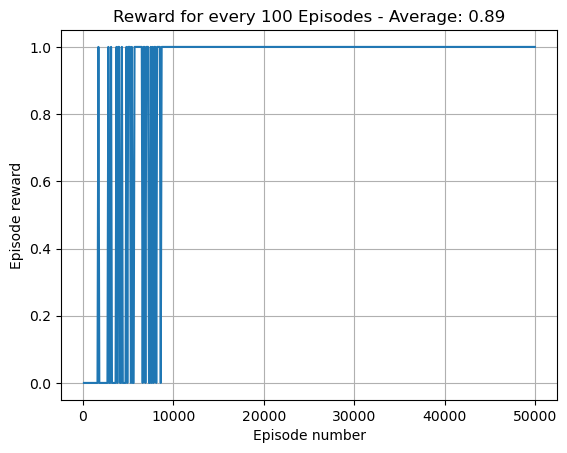

In [13]:
indices = range(100, sarsa.episodes + 1, 100)
episode_selected = [sarsa.episode_num[i - 1] for i in indices]
reward_selected = [np.mean(sarsa.episode_reward[i - 1]) for i in indices]
avg_reward = np.mean(sarsa.episode_reward)

plt.plot(episode_selected, reward_selected)  # Line plot
plt.xlabel('Episode number')
plt.ylabel('Episode reward')
plt.title('Reward for every 100 Episodes - Average: {:0.2f}'.format(avg_reward))
plt.grid(True)
plt.show()

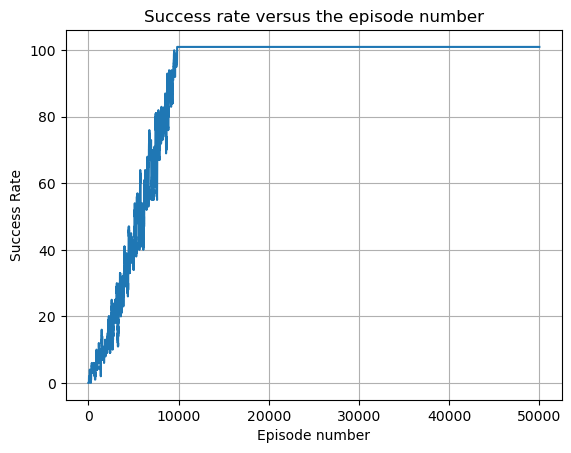

In [14]:
# Assuming sarsa.episode_reward contains rewards for each time step
success_rates = np.zeros(sarsa.episodes)

for s in range(sarsa.episodes):
    success_rates[s] = np.sum(sarsa.episode_reward[max(0, s - 100):(s + 1)])

plt.plot(success_rates)
plt.xlabel('Episode number')
plt.ylabel('Success Rate')
plt.title('Success rate versus the episode number')
plt.grid(True)
plt.show()

# Simulation 

In this part the algorithm is tested using an animation to show which patch the person takes to reach the gift. The results show the path the person takes and the action choice it does in every state. Again based on the simulation here it can be seen that the Q value and the action choice for the states which are the holes are irrelevant as they are not visited. Another point is that the agent shows a possible action even for the case that the person reaches the target. This is mainly beacuase it has to choose between four actions which are right, left, up, and down and there are no other choices. As an aaction should be chosen at each state a random action is chosen in case we are at the gift state. It does not matter because the simulation will be finished as soon as the person reaches the final state. In case we need to have nore clarity on each state and the action to be chosen in rach state, we should define more action choices and increase the action space of the system so thta we may have some action named "STAY" for example.

The goal is reached
Steps 6, Path: [(1, 'RIGHT'), (2, 'DOWN'), (6, 'RIGHT'), (7, 'DOWN'), (11, 'DOWN'), (15, 'DOWN')]


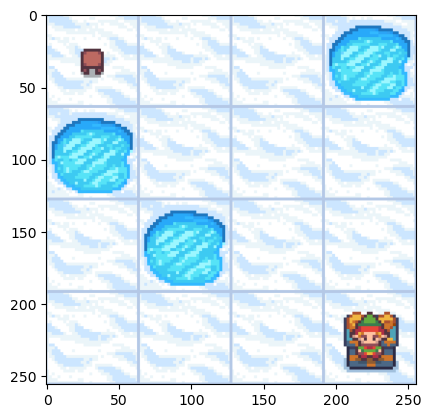

In [15]:

reward=0
t=0
#epsilon=0
state1=env.reset()
env.s
action = sarsa.EpsilonGreedyPolicy(env, Qtable, epsilon, env.s)

episode_Path = []


while t < max_steps:
  state2, reward, done, info, extra_info = env.step(action)
  action = sarsa.EpsilonGreedyPolicy(env, sarsa.Q_table, epsilon, state2)
  screen = env.render()
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  episode_Path.append((state2,label[action]))
  t+=1

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()
if state2 == 15:
    print("The goal is reached")
else:
    print("Nooooo, we fell into a hole")

# We print the number of step it took.
print(f"Steps {t}, Path: {episode_Path}")

